<a href="https://colab.research.google.com/github/abharathkumarr/Machine-Learning-On-Graphs/blob/main/Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Reading in the dataset
data = pd.read_csv('/content/drive/MyDrive/book1.csv')

# Printing out the head of the dataset
data = data.sort_values(["weight"], ascending=False)
data = data.reset_index()
data = data.loc[:100, ["Source", "Target", "weight"]]
print(data.head())

               Source            Target  weight
0        Eddard-Stark  Robert-Baratheon     291
1          Bran-Stark        Robb-Stark     112
2          Arya-Stark       Sansa-Stark     104
3  Daenerys-Targaryen             Drogo     101
4   Joffrey-Baratheon       Sansa-Stark      87


**Visualization Block**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for _, edge in data.iterrows():
    G.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 58
Number of edges: 101


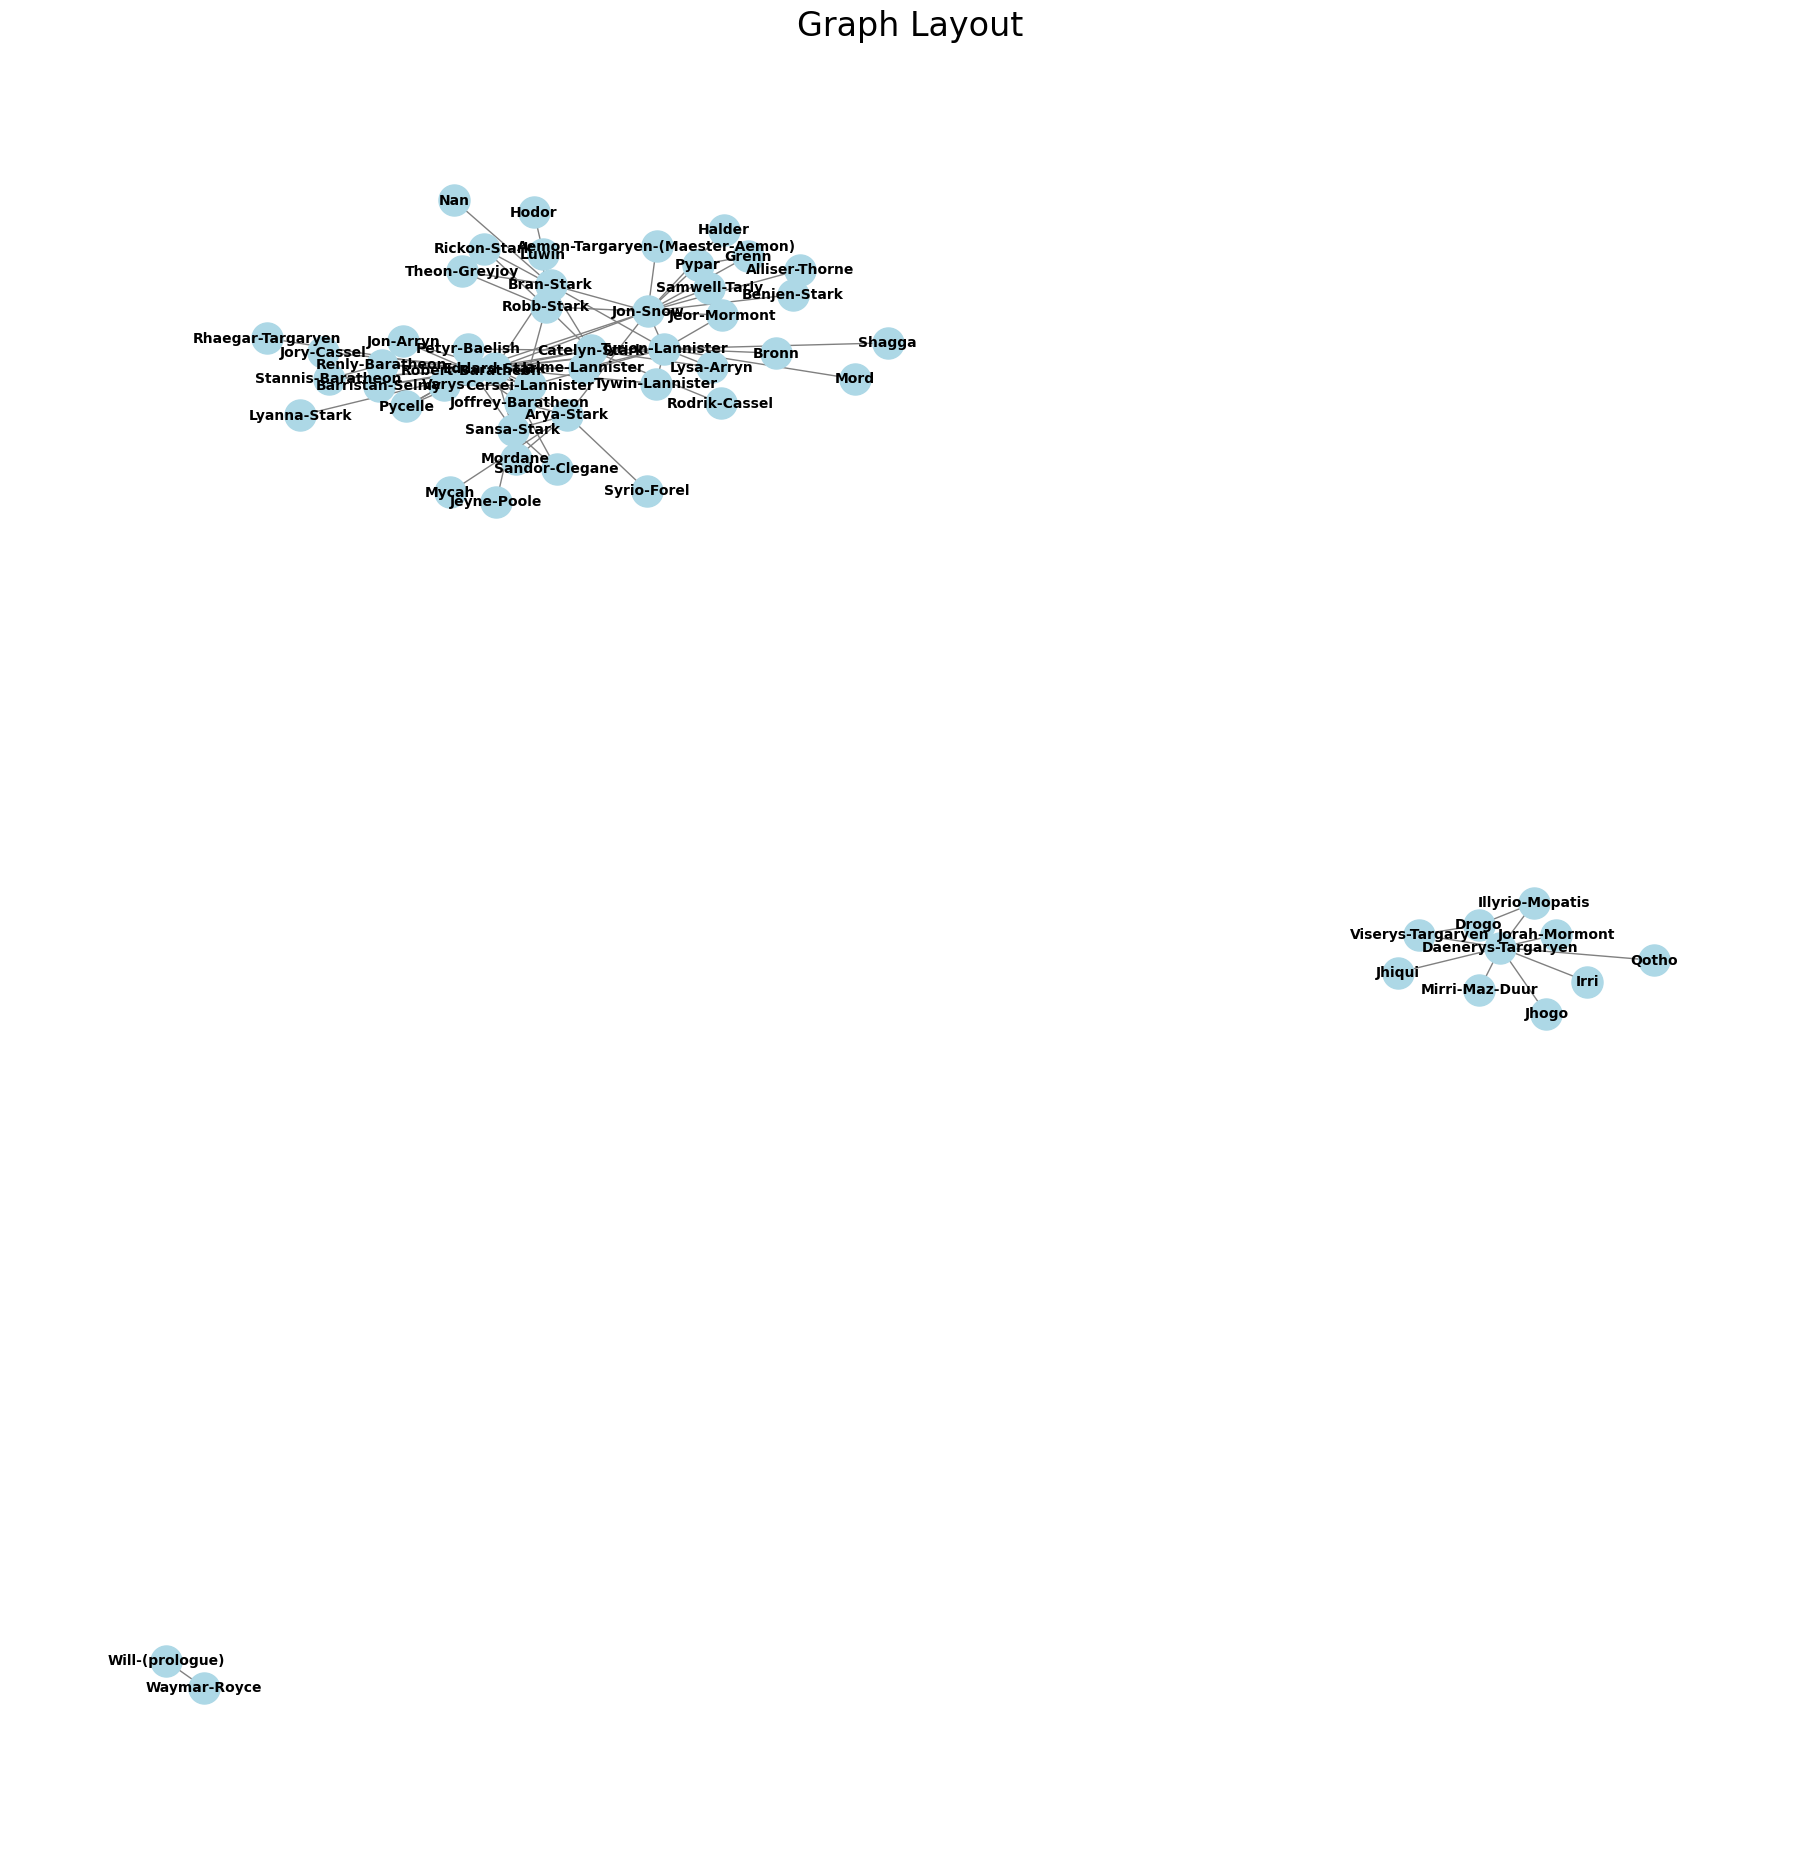

In [ ]:
plt.figure(figsize=(18, 18))
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', node_size=500)

plt.title("Graph Layout", fontsize = 24)
plt.savefig('Graph_Layout.png')
plt.show()

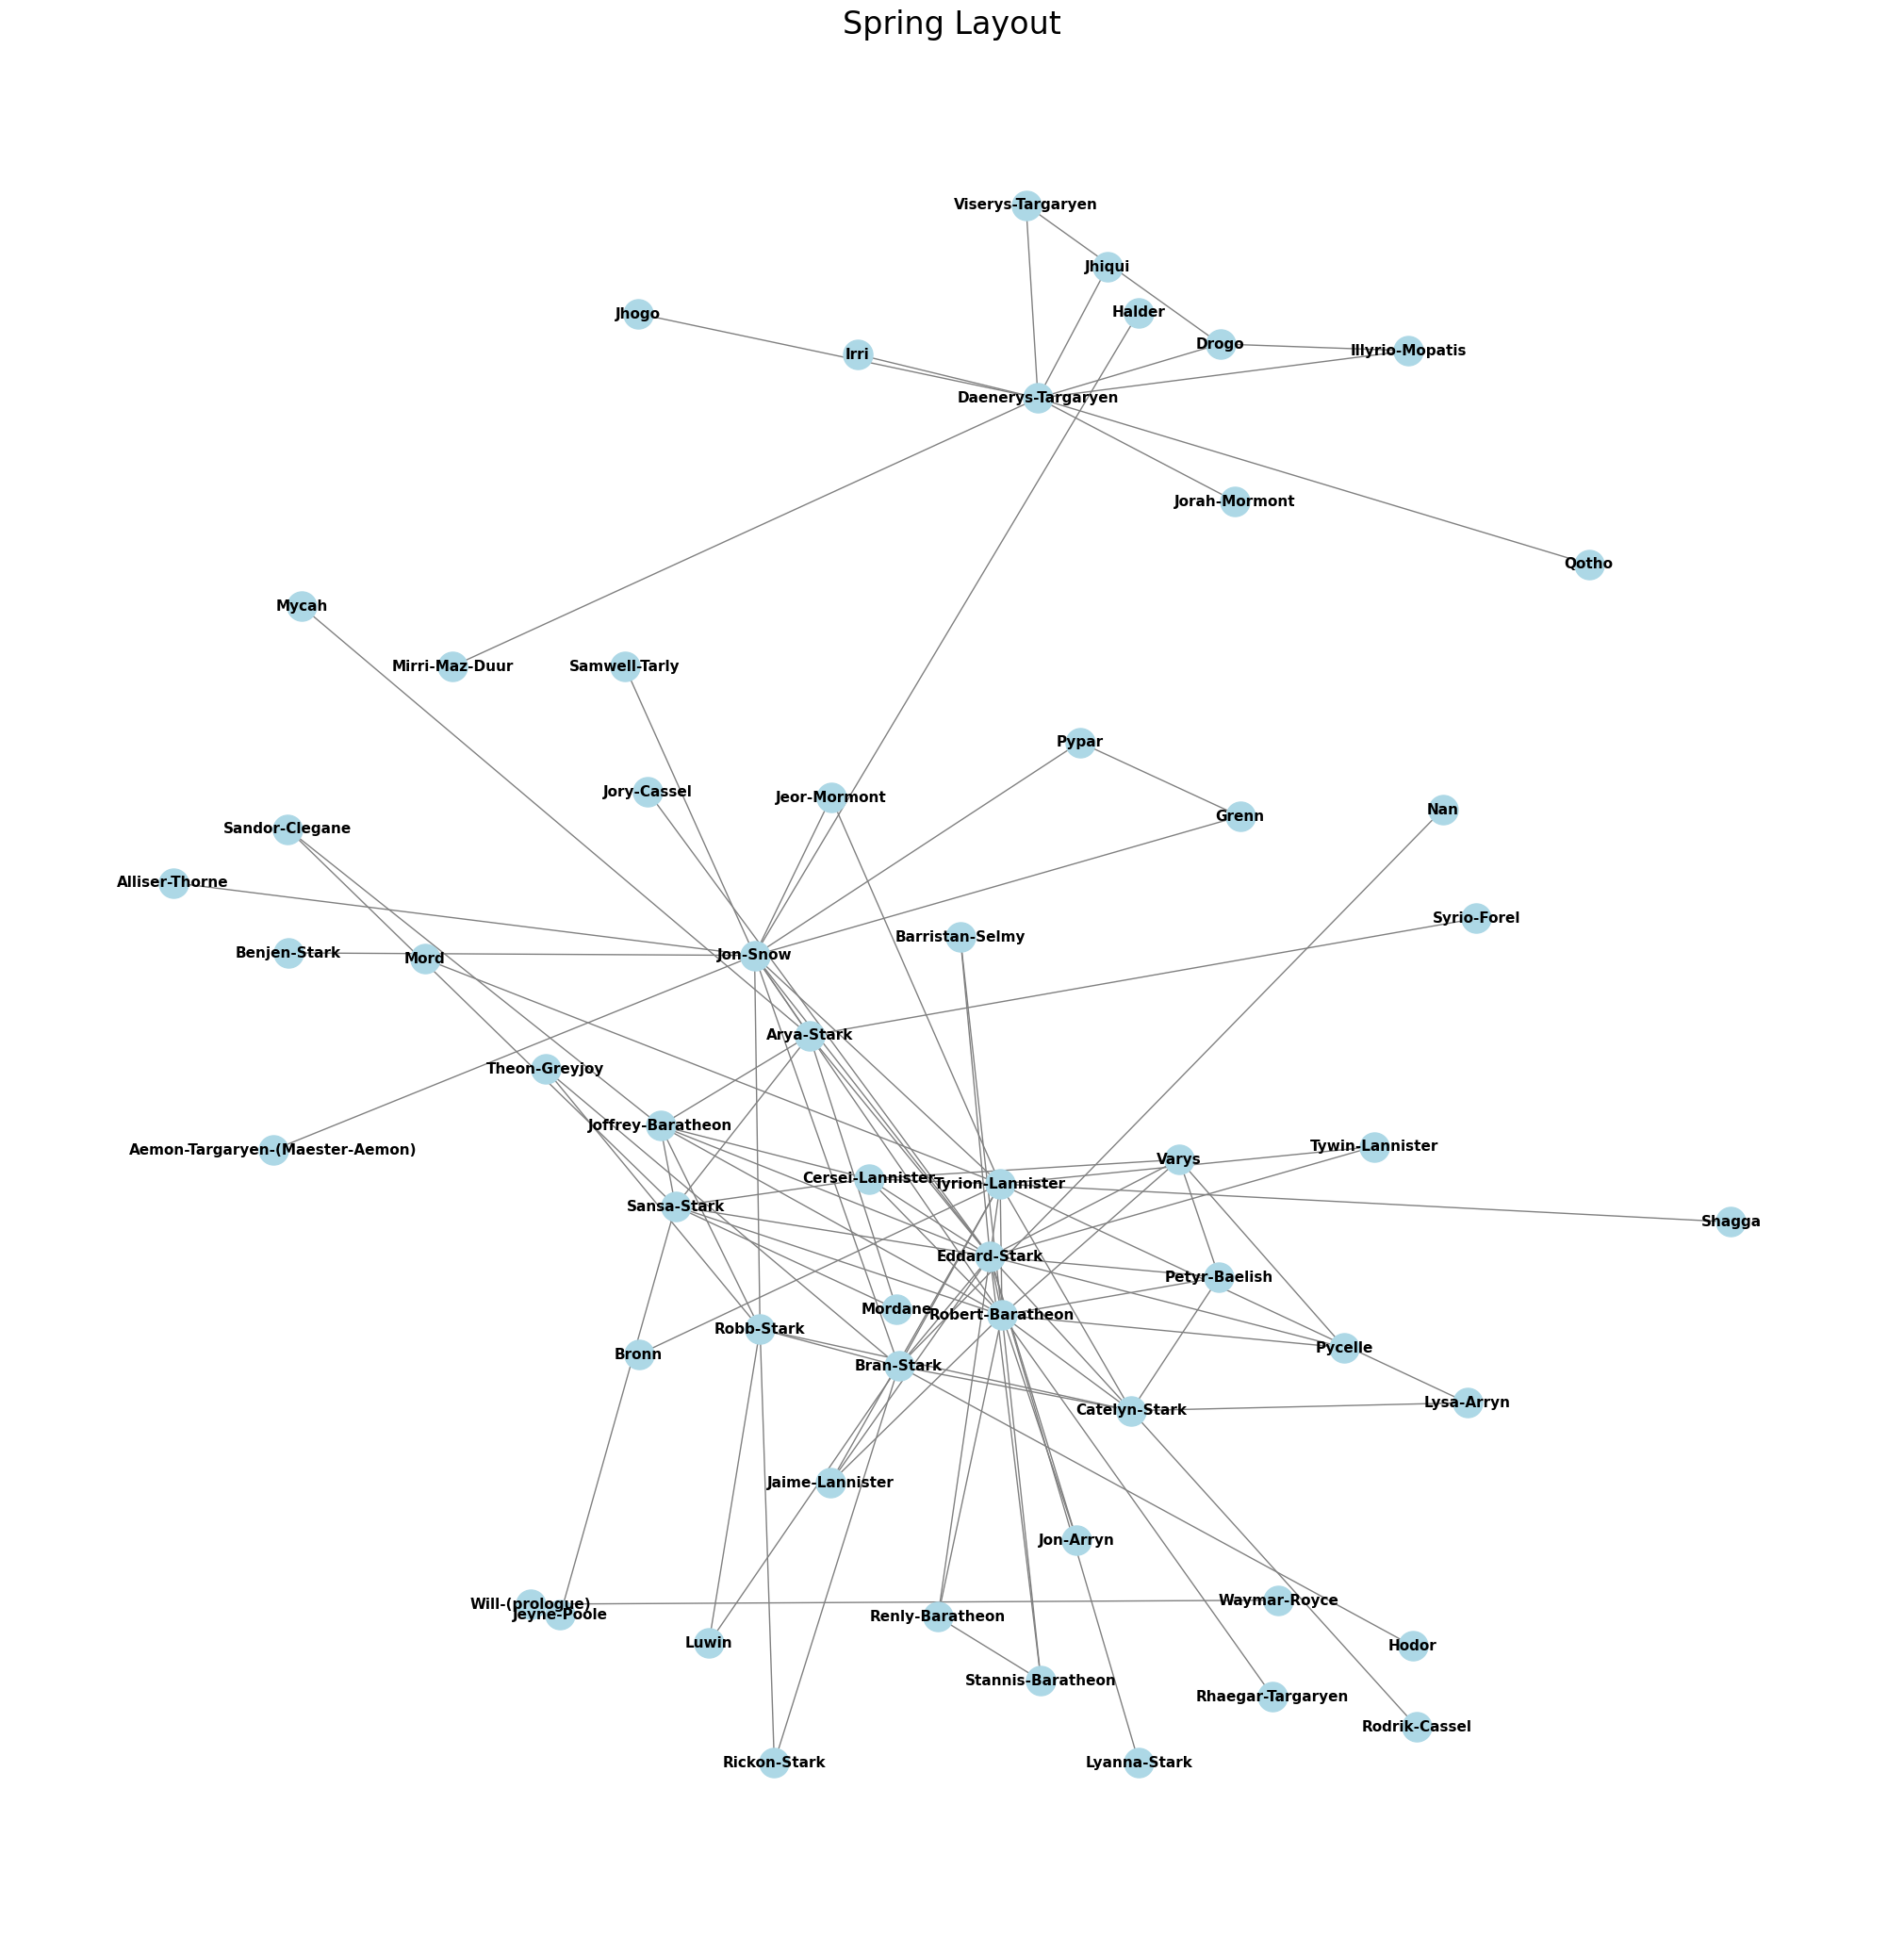

In [ ]:
pos = nx.spring_layout(G, 2)

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=11, font_weight='bold', edge_color='gray')

plt.title("Spring Layout", fontsize = 24)
plt.savefig('Spring_Layout.png')
plt.show()

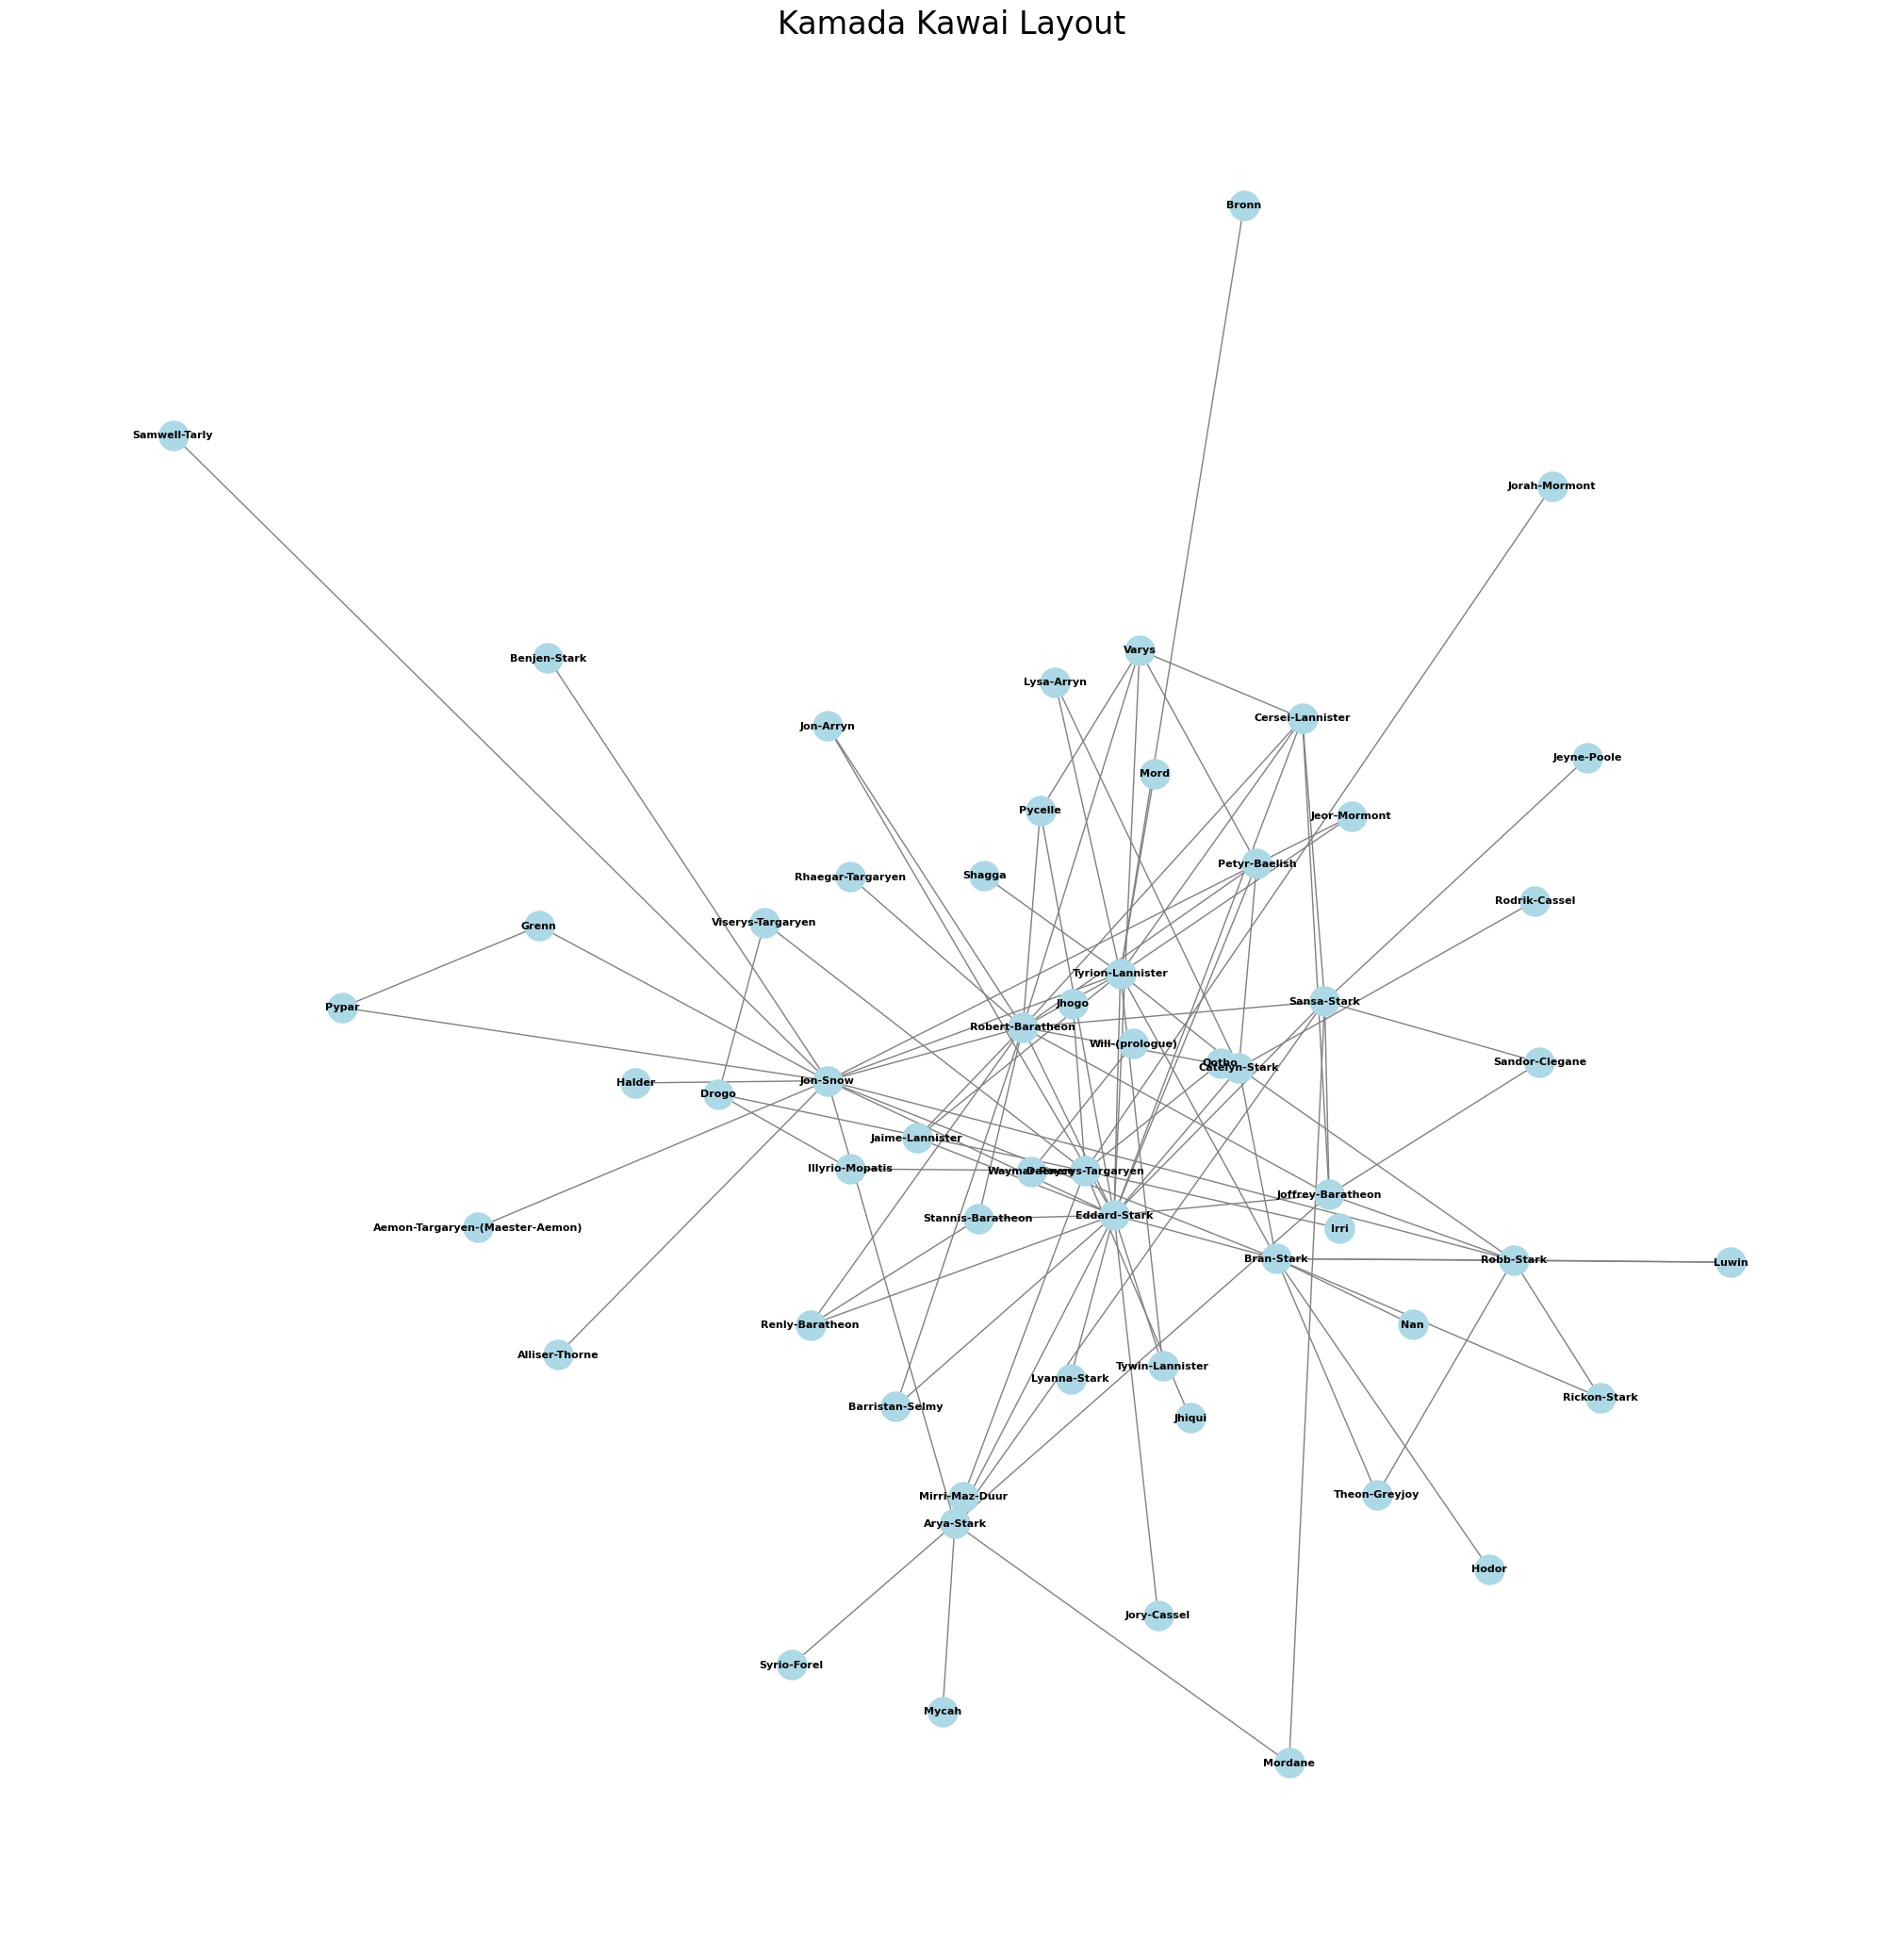

In [ ]:
pos = nx.kamada_kawai_layout(G)

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')

plt.title("Kamada Kawai Layout", fontsize = 24)
plt.savefig('Kamada_Kawai_Layout.png')
plt.show()

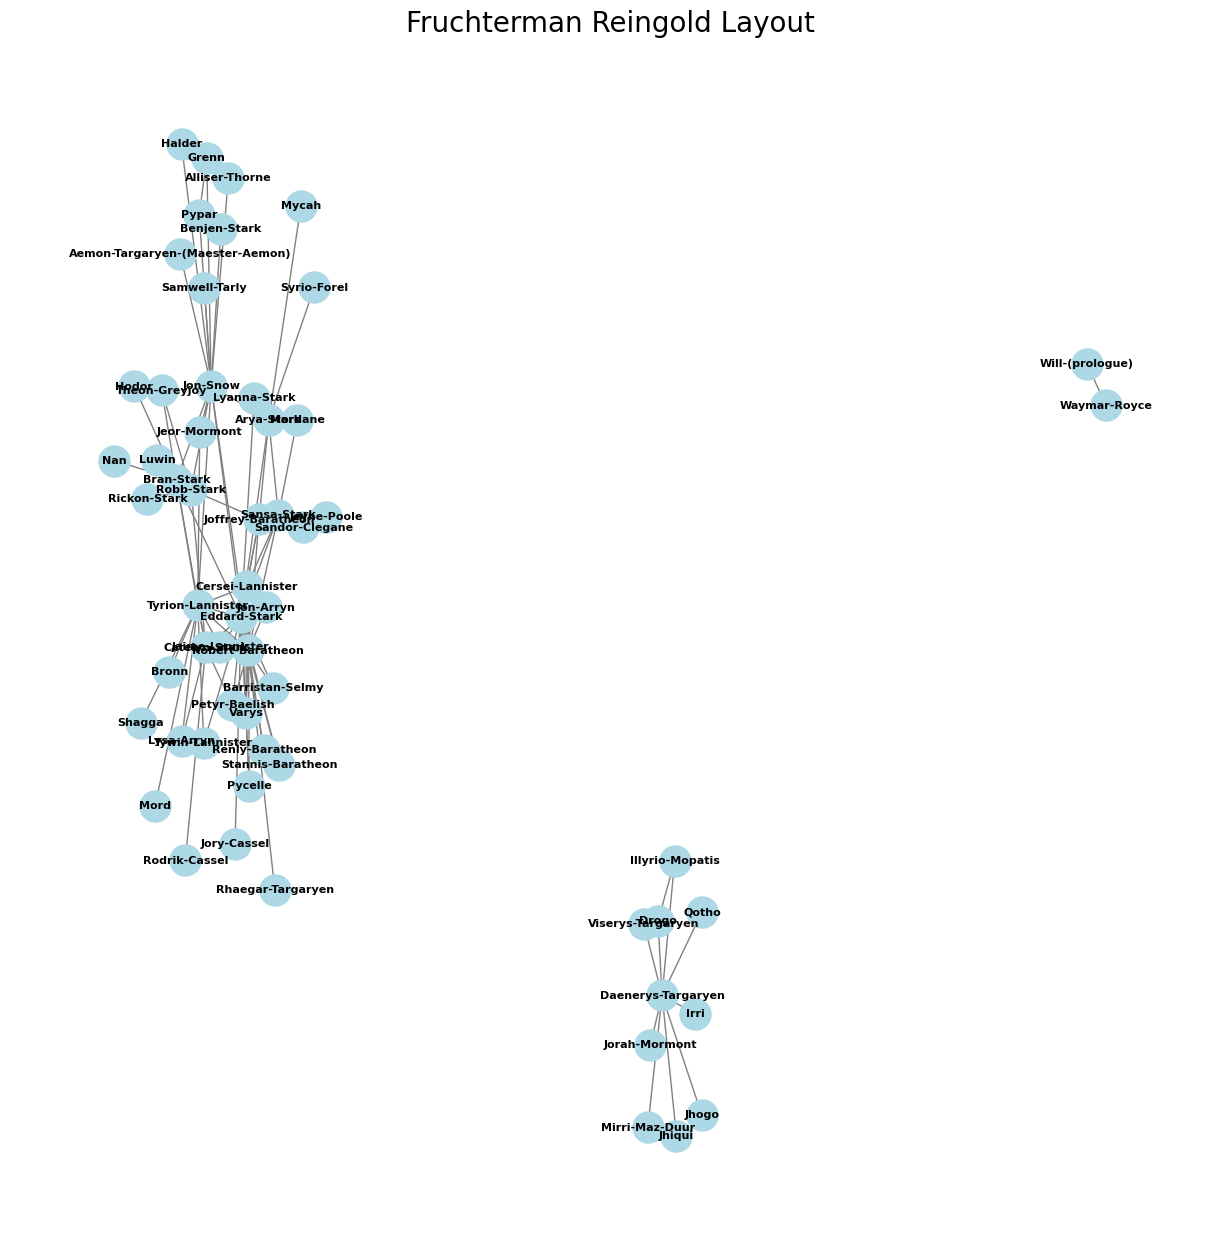

In [ ]:
pos = nx.spectral_layout(G)

# Plot the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')

plt.title("Fruchterman Reingold Layout", fontsize = 20)
plt.savefig('Fruchterman_Reingold_Layout.png')
plt.show()

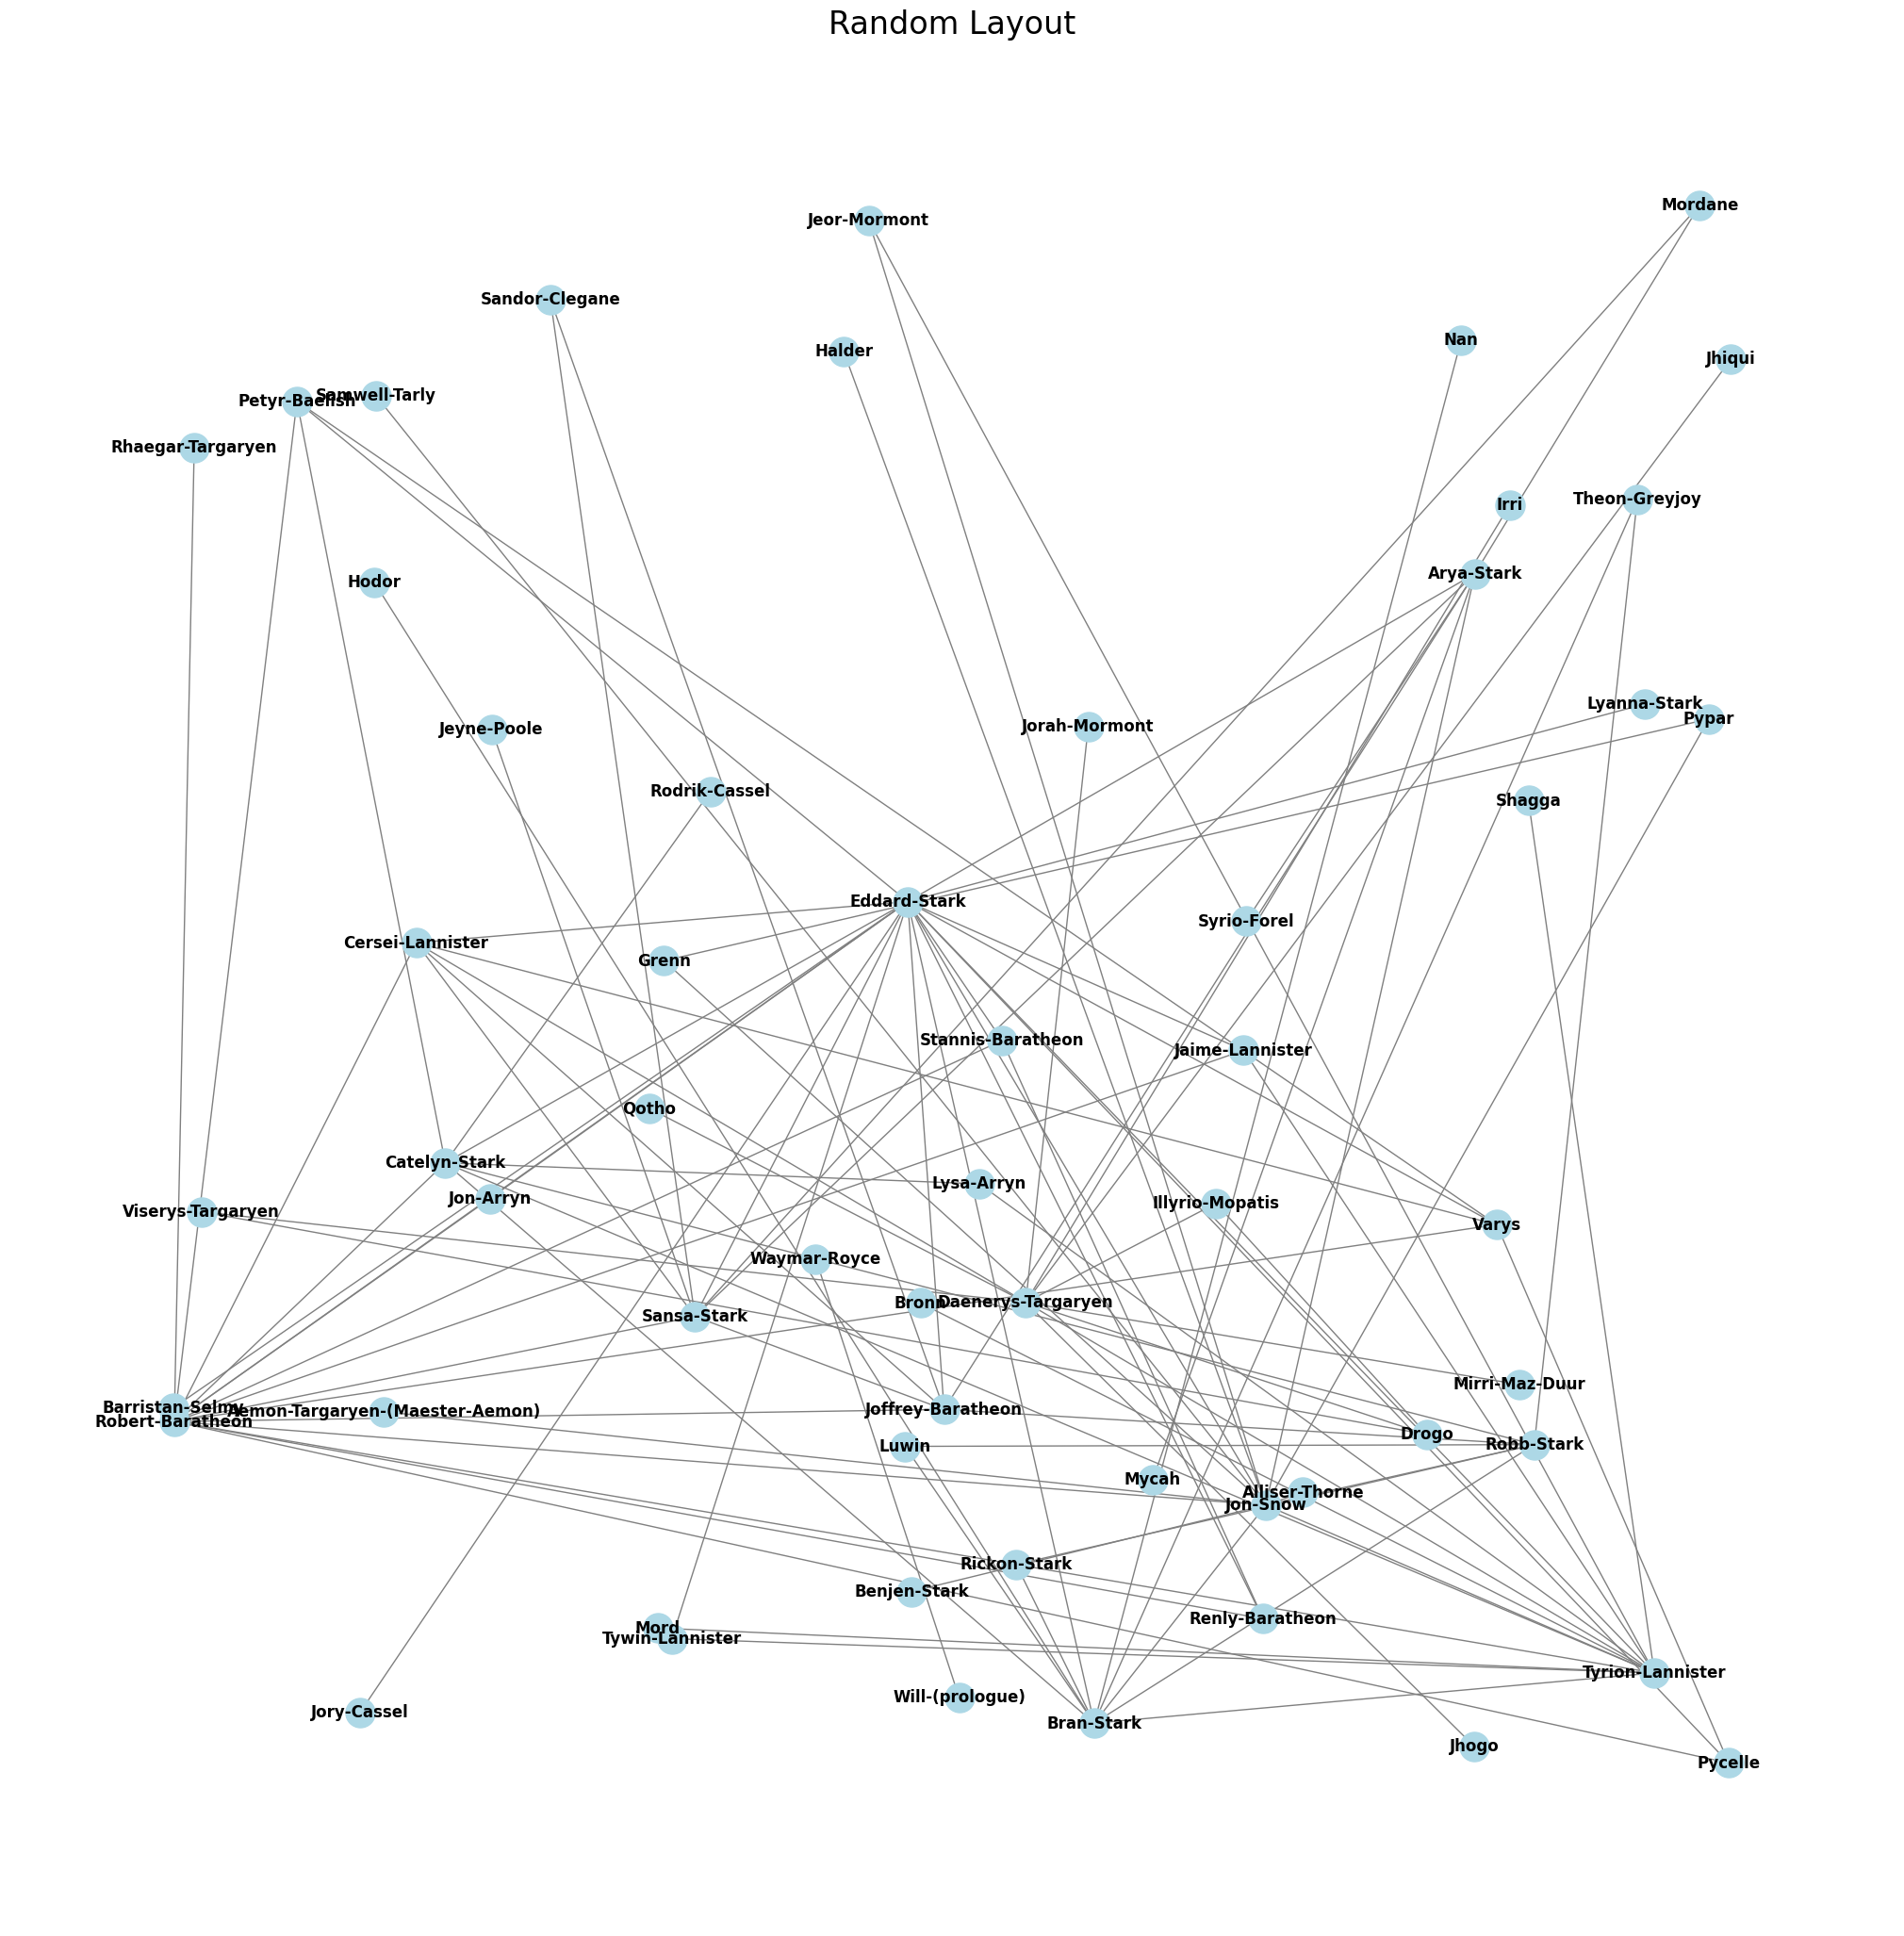

In [ ]:
pos = nx.random_layout(G)

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')

plt.title("Random Layout", fontsize = 24)
plt.savefig('Random_Layout.png')
plt.show()

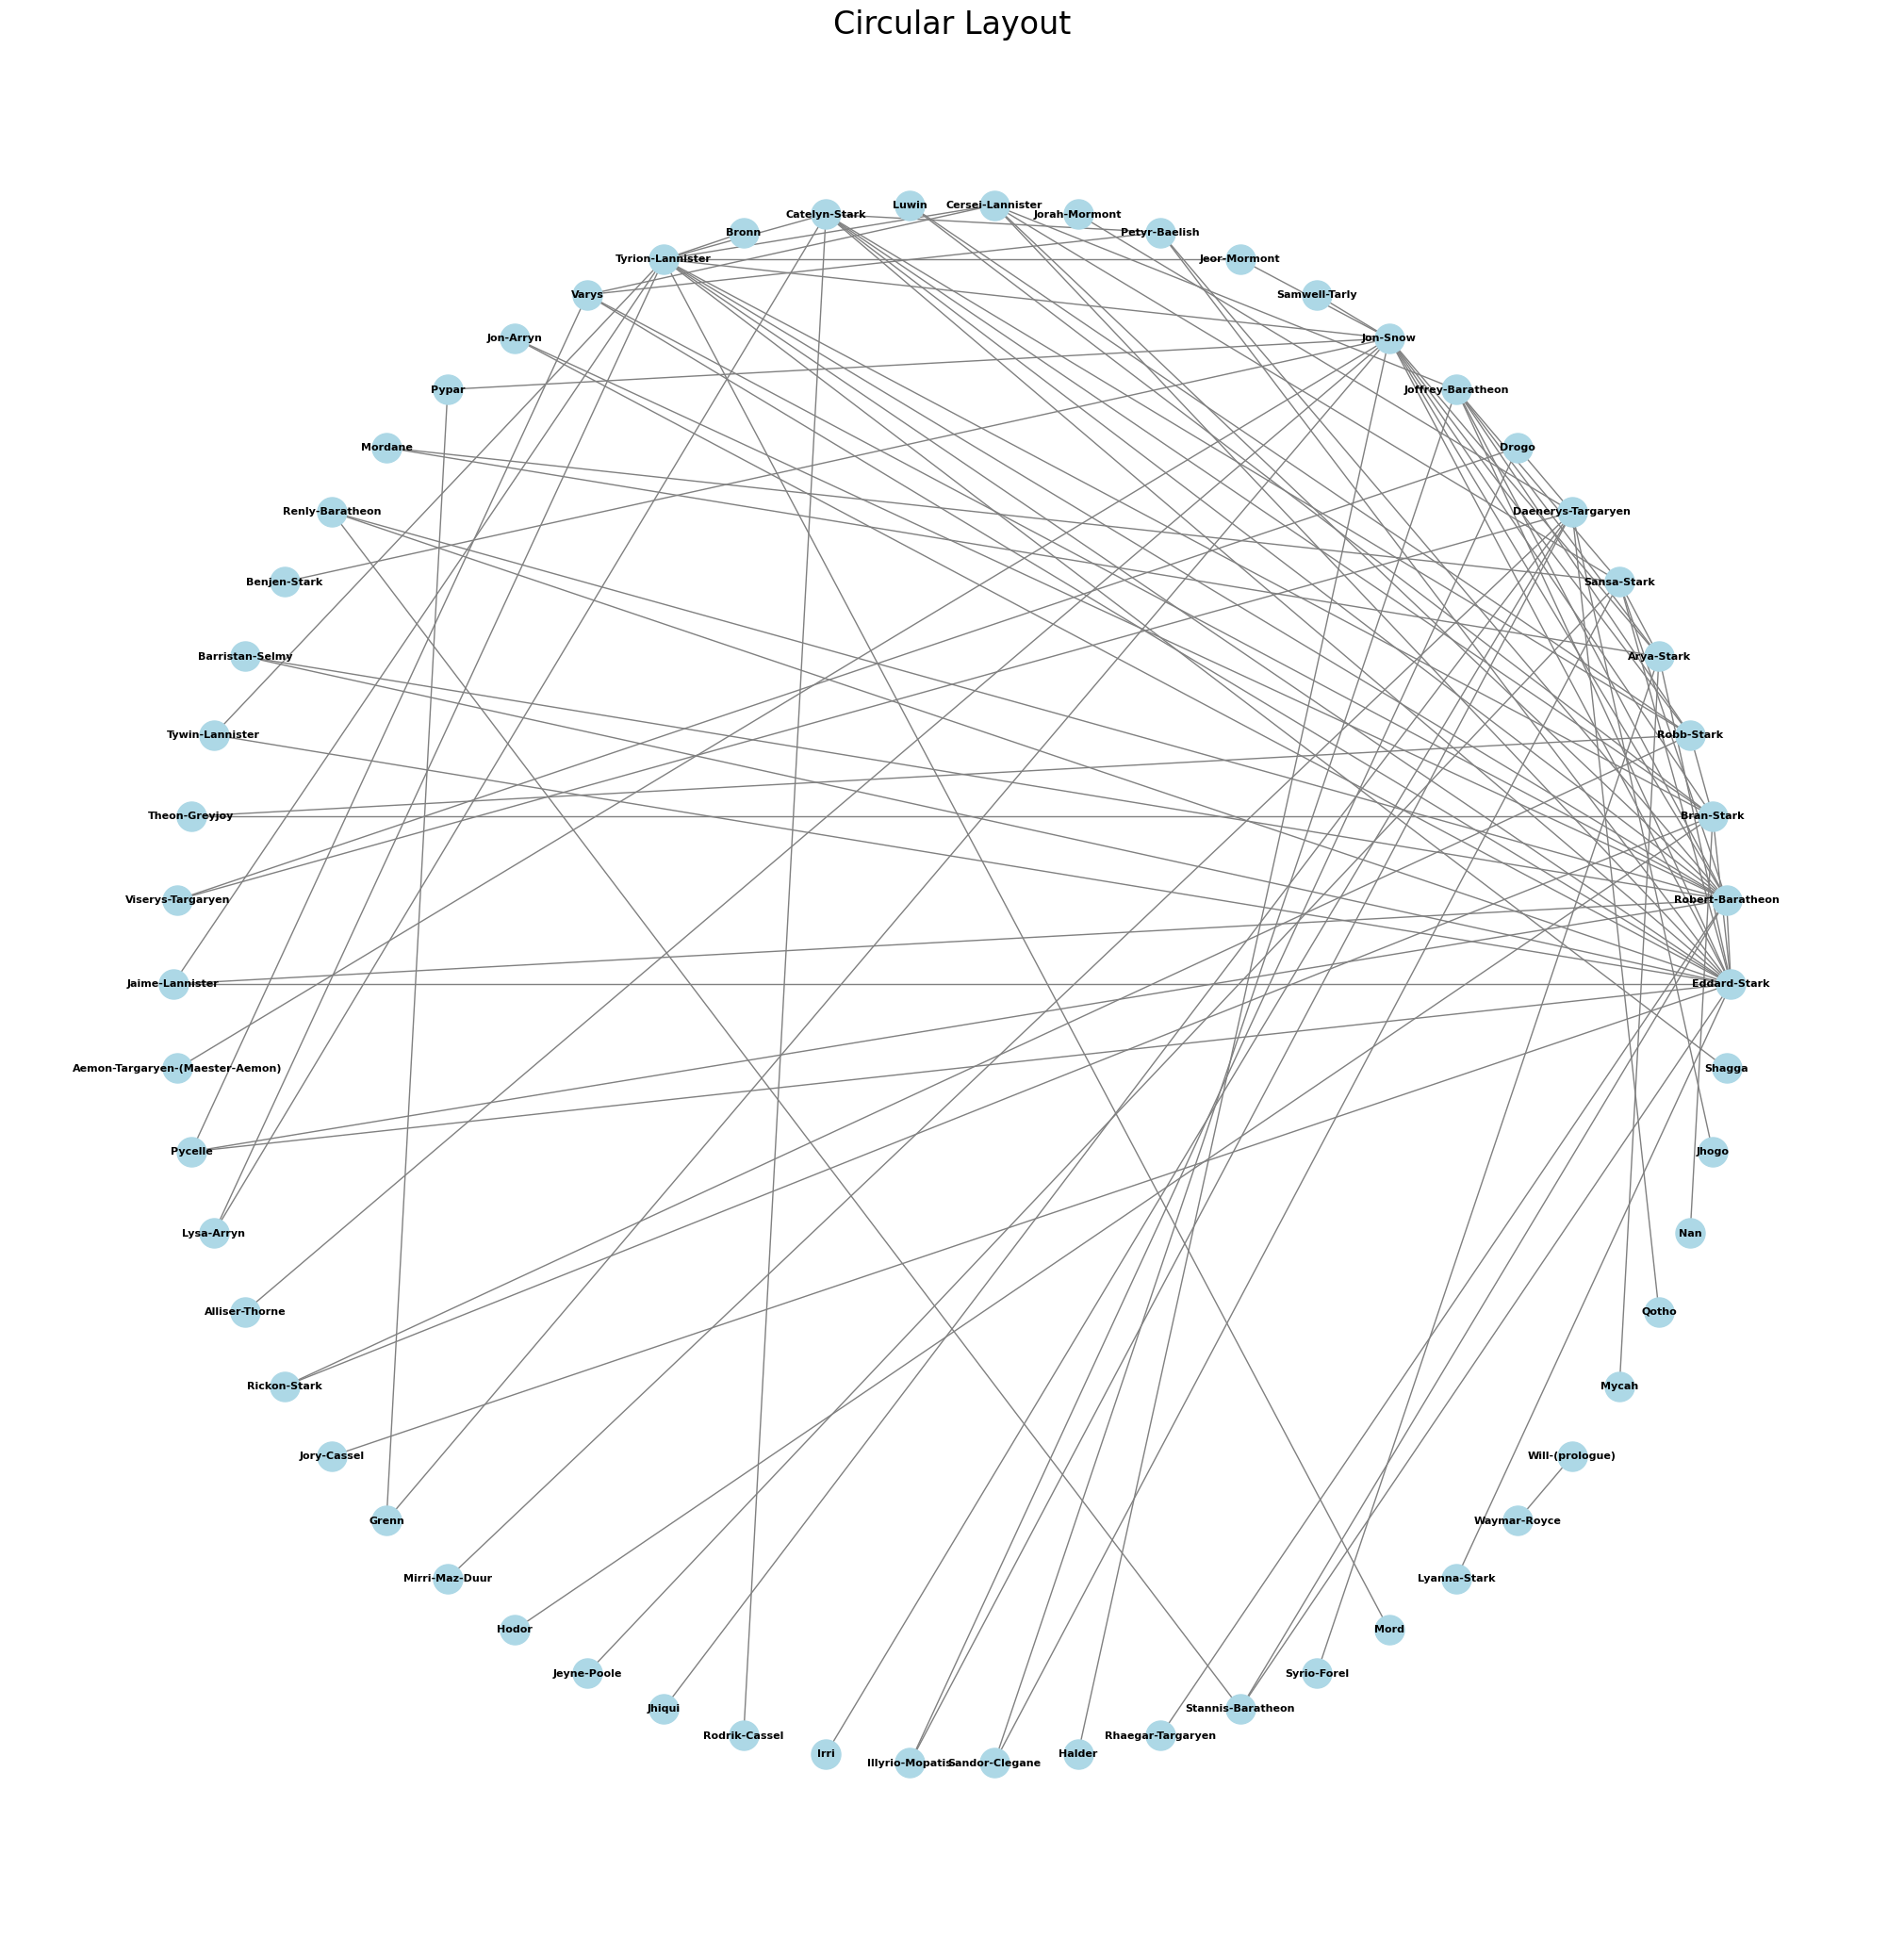

In [ ]:
pos = nx.circular_layout(G, 2)

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(G, pos = nx.circular_layout(G), with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')
plt.title('Circular Layout', fontsize=24)
plt.savefig('Circular_Layout.png')
plt.show()

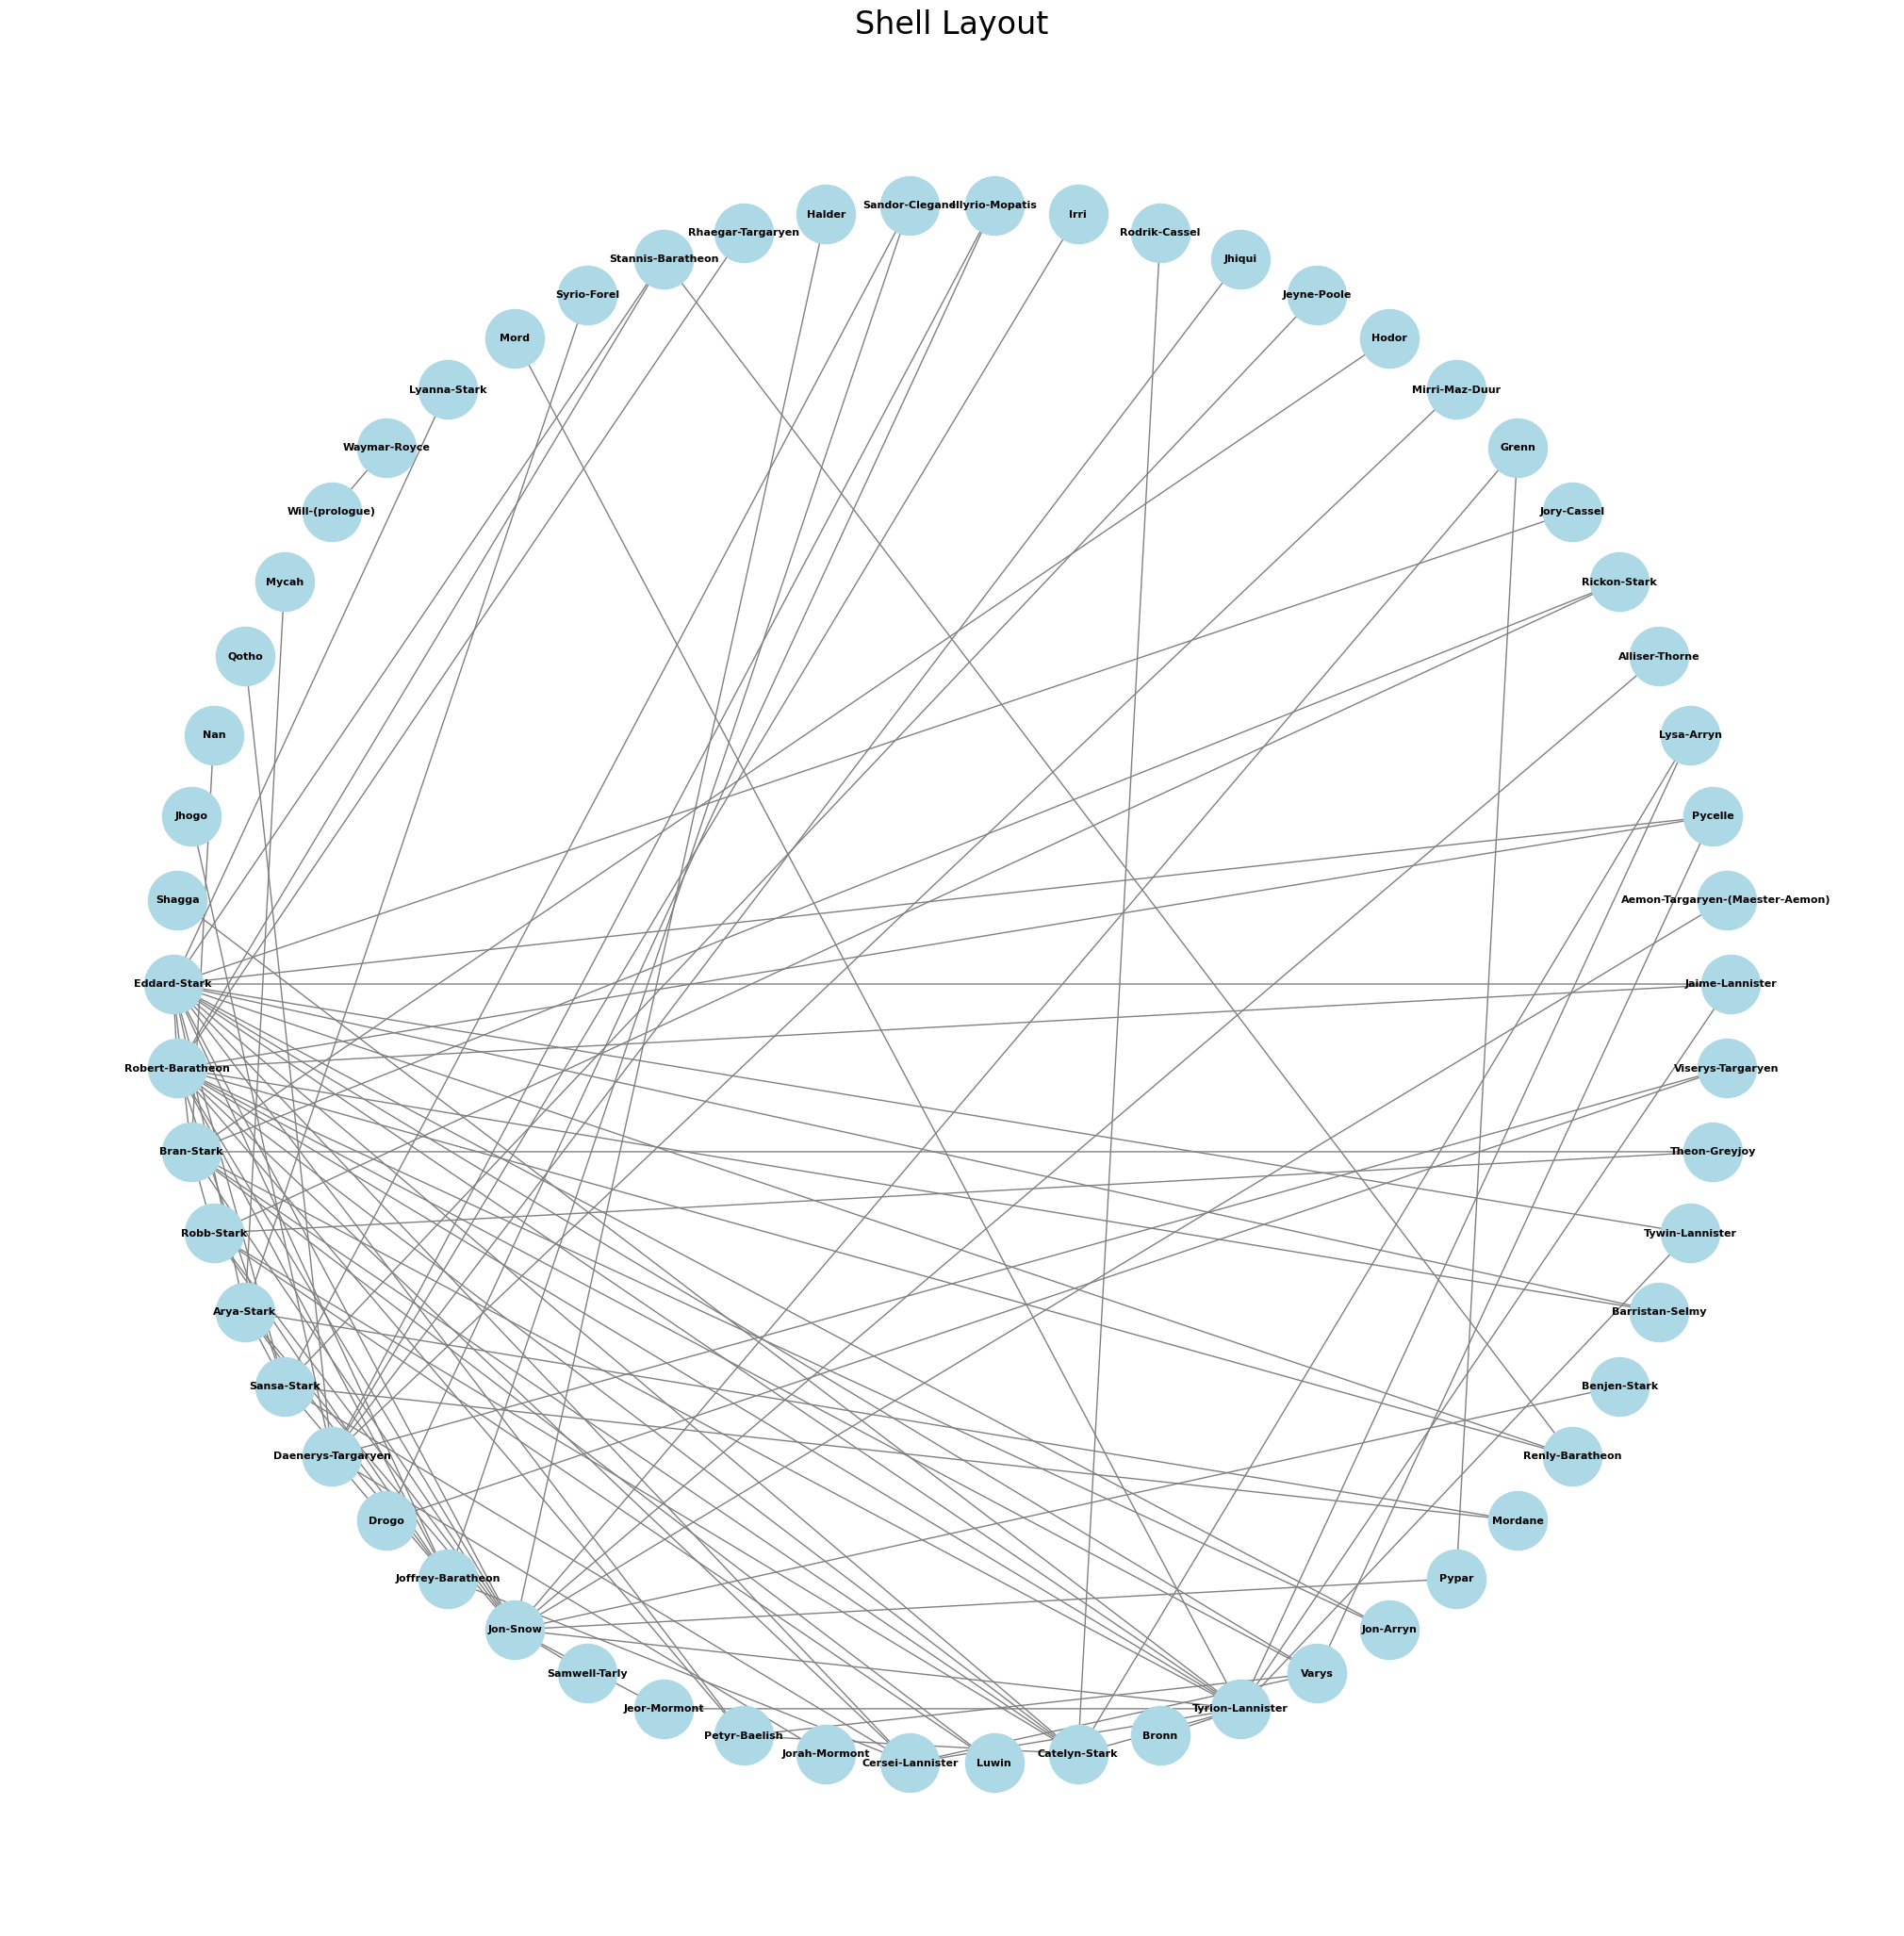

In [ ]:
pos = nx.shell_layout(G)

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(G.subgraph(G.nodes), pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')

plt.title('Shell Layout', fontsize=24)
plt.savefig('Shell_Layout')
plt.show()

**Degree & Centralities Block**

In [ ]:
G = nx.Graph()
for _, edge in data.iterrows():
    G.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

degreeCentrality = nx.degree_centrality(G)
closenessCentrality = nx.closeness_centrality(G)
betweennessCentrality = nx.betweenness_centrality(G)
eigenvectorCentrality = nx.eigenvector_centrality(G)
katzCentrality = nx.katz_centrality(G)

df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree': [G.degree(node) for node in G.nodes()],
    'Degree Centrality': [degreeCentrality[node] for node in G.nodes()],
    'Closeness Centrality': [closenessCentrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweennessCentrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvectorCentrality[node] for node in G.nodes()],
    'Katz Centrality': [katzCentrality[node] for node in G.nodes()]
})

df = df.sort_values('Degree', ascending=False).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df = df.round(2)
print(df)
df.to_csv('/content/drive/MyDrive/activity1_centrality_measures.csv', index=False)

                               Node  Degree  Degree Centrality  \
0                      Eddard-Stark      20               0.35   
1                  Robert-Baratheon      16               0.28   
2                          Jon-Snow      14               0.25   
3                  Tyrion-Lannister      13               0.23   
4                        Bran-Stark      10               0.18   
5                Daenerys-Targaryen       9               0.16   
6                     Catelyn-Stark       8               0.14   
7                       Sansa-Stark       8               0.14   
8                        Arya-Stark       7               0.12   
9                        Robb-Stark       7               0.12   
10                Joffrey-Baratheon       7               0.12   
11                 Cersei-Lannister       6               0.11   
12                            Varys       5               0.09   
13                    Petyr-Baelish       4               0.07   
14        

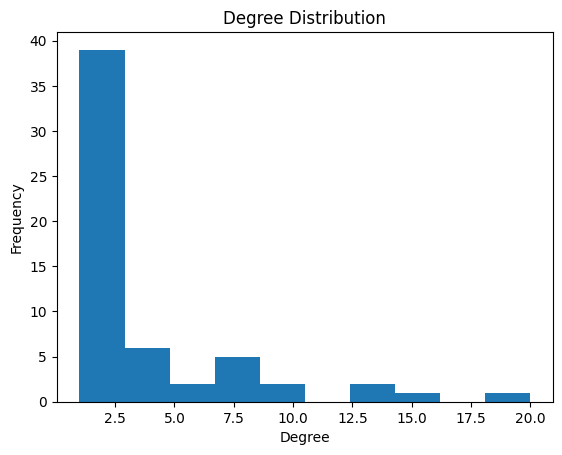

In [ ]:
plt.hist(df['Degree'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.savefig('/content/drive/MyDrive/Degree_Distribution_Activity1.png')
plt.show()